<a href="https://colab.research.google.com/github/mayukbasu/Salary-Estimator/blob/main/Salary_Estimator(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files 
uploaded = files.upload() 

Saving glassdoor_salaries.txt to glassdoor_salaries.txt


In [ ]:
import io 
df = pd.read_csv(io.BytesIO(uploaded['glassdoor_salaries.txt'])) 
df.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
112,112,Data Scientist,$89K-$153K (Glassdoor est.),The Data Scientist will be joining a team of e...,3.80,7Park Data\r\n3.8,"New York, NY","New York, NY",51 to 200 employees,2012,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1
100,100,Data Engineer Intern,-1,About the company\r\n\r\nThe name ThousandEyes...,4.70,ThousandEyes\r\n4.7,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
80,80,Scientist,$50K-$102K (Glassdoor est.),Scientist\r\nOrganization\r\n\r\n\r\nEurofins ...,2.70,EAG Laboratories\r\n2.7,"Maryland Heights, MO","San Diego, CA",501 to 1000 employees,1978,Subsidiary or Business Segment,Research & Development,Business Services,$50 to $100 million (USD),-1
228,228,"Principal Scientist, Chemistry & Immunology",$54K-$115K (Glassdoor est.),SUMMARY\r\n\r\nThe Principal Scientist will re...,3.30,Rochester Regional Health\r\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
402,402,Data Engineer 4 - Contract (Remote),-1,"Purposes\r\n\r\nThis is a contract, remote pos...",4.20,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,-1


In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

# **Data Cleaning**

In [ ]:
#salary parsing
#company name text only
#state field
#age of company
#parsing of job description(python, etc)

#Salary parsing

In [ ]:
df = df[df['Salary Estimate'] != '-1']                      # removes (-1) values in Salary estimate column
df.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
935,935,Senior Data Science Systems Engineer,$56K-$99K (Glassdoor est.),"MITRE’s Army Concepts, Platforms and Theater O...",3.20,MITRE\r\n3.2,"Hampton, VA","Bedford, MA",5001 to 10000 employees,1958,Nonprofit Organization,Federal Agencies,Government,$1 to $2 billion (USD),"Battelle, General Atomics, SAIC"
431,431,"Scientist, Bacteriology",$74K-$149K (Glassdoor est.),"Scientist, Bacteriology\r\nLocation\r\n\r\n\r\...",2.10,Cerus Corporation\r\n2.1,"Concord, CA","Concord, CA",201 to 500 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$25 to $50 million (USD),-1
779,779,Data Analyst Senior,$48K-$85K (Glassdoor est.),Data Analyst Senior\r\nLocation\r\n\r\n\r\nPhi...,3.00,AmeriHealth Caritas\r\n3.0,"Philadelphia, PA","Philadelphia, PA",5001 to 10000 employees,1983,Company - Private,Insurance Carriers,Insurance,$5 to $10 billion (USD),"UnitedHealth Group, Molina Healthcare, Centene"
325,325,Senior Data Analyst,$55K-$100K (Glassdoor est.),As a precaution and in compliance with applica...,2.80,Dodge Data & Analytics\r\n2.8,"Hamilton, NJ","Hamilton, NJ",201 to 500 employees,2014,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1
521,521,Senior Data Scientist 4 Artificial Intelligence,$92K-$146K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310468\r...,3.80,PNNL\r\n3.8,"Seattle, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."


In [ ]:
# remove (Glassdoor est.) from salary estimate column

salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
salary.iloc[160:180]

190                             $73K-$119K 
191                            $110K-$175K 
192                             $74K-$140K 
193                            $100K-$190K 
194                              $43K-$80K 
197                        $17-$24 Per Hour
198                             $91K-$149K 
199                              $42K-$82K 
200                            $116K-$185K 
201                             $59K-$116K 
202                              $48K-$95K 
203                              $31K-$72K 
204                            $105K-$198K 
205                             $55K-$100K 
206                             $98K-$182K 
207                             $73K-$124K 
208    Employer Provided Salary:$200K-$250K
209                        $21-$34 Per Hour
210                            $117K-$206K 
211                            $111K-$183K 
Name: Salary Estimate, dtype: object

In [ ]:
# separate columns for 'per hour' and 'Employer Provided Salary'

df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [ ]:
df.iloc[160:180]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
190,190,Senior Data Scientist / Machine Learning,$73K-$119K (Glassdoor est.),IMMEDIATE NEED FOR A SENIOR DATA SCIENTIST / M...,3.90,Health IQ\r\n3.9,"Dallas, TX","Mountain View, CA",201 to 500 employees,2013,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable,-1,0,0
191,191,Data Scientist - Health Data Analytics,$110K-$175K (Glassdoor est.),"At Nuna, our mission is to make high-quality h...",4.20,Nuna\r\n4.2,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2010,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,0
192,192,Data Engineer 5 - Contract (Remote),$74K-$140K (Glassdoor est.),Purposes\r\n\r\nThis is a remote contract posi...,4.20,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,-1,0,0
193,193,Senior Scientist - Neuroscience,$100K-$190K (Glassdoor est.),Sunovion Pharmaceuticals is looking for a Seni...,3.50,Sunovion\r\n3.5,"Marlborough, MA","Marlborough, MA",1001 to 5000 employees,2010,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$1 to $2 billion (USD),"Shire, GlaxoSmithKline, Allergan",0,0
194,194,Senior Data Analyst,$43K-$80K (Glassdoor est.),About the Role:\r\n\r\n\r\nThe Senior Speciali...,2.90,National Student Clearinghouse\r\n2.9,"Herndon, VA","Herndon, VA",201 to 500 employees,1993,Nonprofit Organization,Colleges & Universities,Education,$25 to $50 million (USD),"Ellucian, Parchment, College Board",0,0
197,197,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\r\n\r\nAbout\r\n\r\n\r\nTower Health ...,3.60,Tower Health\r\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,1,0
198,198,"Risk and Analytics IT, Data Scientist",$91K-$149K (Glassdoor est.),OUR AGENCY\r\n\r\nMaking a Difference\r\n\r\nS...,2.70,State of Wisconsin Investment Board\r\n2.7,"Madison, WI","Madison, WI",51 to 200 employees,1951,Government,Investment Banking & Asset Management,Finance,$50 to $100 million (USD),-1,0,0
199,199,"Scientist, Analytical Development",$42K-$82K (Glassdoor est.),Rubius Therapeutics is a clinical-stage biopha...,4.40,Rubius Therapeutics\r\n4.4,"Cambridge, MA","Cambridge, MA",201 to 500 employees,2013,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),-1,0,0
200,200,Senior Data Scientist,$116K-$185K (Glassdoor est.),"Location: San Francisco, CA- United States\r\n...",4.00,Autodesk\r\n4.0,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),-1,0,0
201,201,Analytics Manager,$59K-$116K (Glassdoor est.),Responsible for both high level and granular m...,4.30,OneMagnify\r\n4.3,"Dearborn, MI","Detroit, MI",201 to 500 employees,1967,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,0,0


In [ ]:
# remove k and dollar sign in salary

minus_kd = salary.apply(lambda x: x.replace('K', '').replace('$',''))
minus_kd.iloc[160:180]       

190                             73-119 
191                            110-175 
192                             74-140 
193                            100-190 
194                              43-80 
197                      17-24 Per Hour
198                             91-149 
199                              42-82 
200                            116-185 
201                             59-116 
202                              48-95 
203                              31-72 
204                            105-198 
205                             55-100 
206                             98-182 
207                             73-124 
208    Employer Provided Salary:200-250
209                      21-34 Per Hour
210                            117-206 
211                            111-183 
Name: Salary Estimate, dtype: object

In [ ]:
# remove per hour and employer provided salary

minus_hr = minus_kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
minus_hr.iloc[160:180] 

190     73-119 
191    110-175 
192     74-140 
193    100-190 
194      43-80 
197      17-24 
198     91-149 
199      42-82 
200    116-185 
201     59-116 
202      48-95 
203      31-72 
204    105-198 
205     55-100 
206     98-182 
207     73-124 
208     200-250
209      21-34 
210    117-206 
211    111-183 
Name: Salary Estimate, dtype: object

In [ ]:
# minimum,maximum and avg salary column

df['min_salary'] = minus_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = minus_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary)/2
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.40,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.50
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.00
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.80,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.50
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.90,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.50


#Converting the Company name into text(only)

In [ ]:
#remove ratings after company name 
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)
df.head(1)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research\r\n


In [ ]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', ''))
df.head(1)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research


#State field 

In [ ]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df.head(1)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research,NM


In [ ]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 UT              10
 WI              10
 IN              10
 MO               9
 AZ               9
 AL               8
 DE               6
 GA               6
 MI               6
 KY               6
 CT               5
 IA               5
 OR               4
 NE               4
 LA               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 SC               1
 RI               1
Name: job_state, dtype: int64

Checking if the job is in the head quarters

In [ ]:
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)
df.head(1)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research,NM,0


#Age of company

In [ ]:
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2020 - x)

#Parsing of job description

In [ ]:
#python

df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df.python_yn.value_counts()

1    392
0    350
Name: python_yn, dtype: int64

In [ ]:
#r studio 

df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df.R_yn.value_counts()

0    740
1      2
Name: R_yn, dtype: int64

In [ ]:
#spark 

df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()

0    575
1    167
Name: spark, dtype: int64

In [ ]:
#aws 

df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()

0    566
1    176
Name: aws, dtype: int64

In [ ]:
#excel

df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()

1    388
0    354
Name: excel, dtype: int64

Drop Unnamed first column

In [ ]:
df_out = df.drop(['Unnamed: 0'], axis =1)

In [ ]:
df_out.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.40,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.50,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.00,KnowBe4,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.80,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.50,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.90,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.50,Affinity Solutions,NY,1,22,1,0,0,0,1


# Job title and seniority 

Suppose, if we have Healthcare Data scientist in the title it will assign Data Scientist to it. That is simplifying the title

In [ ]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

Making a new column for the title simplifier

In [ ]:
df['job_simplifier'] = df['Job Title'].apply(title_simplifier)

In [ ]:
df.job_simplifier.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simplifier, dtype: int64

Now, lets assign the level of seniority to the titles and keep every seniority same.

In [ ]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [ ]:
df['seniority'] = df['Job Title'].apply(seniority)

In [ ]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

Drop Los Angeles from Location

In [ ]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 UT              10
 WI              10
 IN              10
 MO               9
 AZ               9
 AL               8
 DE               6
 GA               6
 MI               6
 KY               6
 CT               5
 IA               5
 OR               4
 NE               4
 LA               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 SC               1
 RI               1
Name: job_state, dtype: int64

In [ ]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

The method strip() returns a copy of the string in which all chars have been stripped from the beginning and the end of the string (default whitespace characters). Simply, this syntax is used when a user can enter some data and you want to make sure that the user has entered something, rather than nothing.

In [ ]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
GA      6
DE      6
MI      6
KY      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

#  Job description length 

In [ ]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2555
1       4828
2       3495
3       3926
4       2748
5       3783
6       1808
7       3847
8       1561
9       4609
10      2789
11      3522
12      3980
13      4942
14      3799
15      1902
16      3676
17      4201
18      3549
19      4434
20      2944
21      6967
22      6472
23      2951
25      3806
26      3728
27      4452
28      4984
29      5057
30      3495
31      3926
32      3376
33      5126
34      2378
35      2187
36      1753
37      5044
38      3736
39      3602
40      1758
41      3079
43      2042
44      3872
45      3558
46      9165
48      3239
49      7325
50      3438
51      2730
52      2769
54      2953
55      4277
56      1649
57      4772
58      4495
59      3590
60      4244
61      5065
62      1808
63      3783
65      4852
66      1409
67      2962
68      4991
70      2527
72      1963
73      3123
75      8451
76      2352
77      2312
78      1902
79      2929
80      2703
81      4501
82      2651
83      4333
84      3437

# Competitors Count

In [ ]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [ ]:
df['Competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [ ]:
df['Competitors_count']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
25     3
26     0
27     0
28     0
29     0
30     0
31     3
32     0
33     0
34     0
35     3
36     0
37     1
38     0
39     0
40     0
41     3
43     0
44     0
45     3
46     3
48     0
49     3
50     0
51     3
52     3
54     0
55     3
56     0
57     3
58     0
59     0
60     3
61     2
62     0
63     3
65     0
66     0
67     0
68     3
70     3
72     0
73     0
75     4
76     0
77     0
78     0
79     0
80     0
81     3
82     3
83     0
84     0
85     0
86     0
87     3
88     0
89     0
90     3
91     3
92     0
93     0
94     3
95     0
96     0
97     0
99     0
101    3
102    0
104    0
105    0
106    3
107    3
108    3
109    3
110    0
112    0
113    3
116    3
117    3
118    3
119    0
120    3
122    0
123    3
124    3
125    2
1

# Converting wage from hourly to annual 

In [ ]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

 If we multiplied the min salary for hourly workers by 2000, we would get their rough yearly salary. Since the units for annual salary are divided by 1000 (70 means 70,000 dollars), we just divide the 2000 / 1000 and get 2. Thus if we multiply the hourly wage by 2 we get their annual salary in the same units.

In [ ]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [ ]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simplifier,seniority,desc_len,Competitors_count
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research,NM,0,47,1,0,0,0,1,data scientist,na,2555,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.40,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.50,University of Maryland Medical System,MD,0,36,1,0,0,0,0,data scientist,na,4828,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.00,KnowBe4,FL,1,10,1,0,1,0,1,data scientist,na,3495,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.80,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.50,PNNL,WA,1,55,1,0,0,0,0,data scientist,na,3926,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.90,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.50,Affinity Solutions,NY,1,22,1,0,0,0,1,data scientist,na,2748,3


Dropping \r and \n from Job description column

In [ ]:
df['Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ''))
df['Job Description'] = df['Job Description'].apply(lambda x: x.replace('\r', ''))
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simplifier,seniority,desc_len,Competitors_count
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data ScientistLocation: Albuquerque, NMEducati...",3.80,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research,NM,0,47,1,0,0,0,1,data scientist,na,2555,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:I. General SummaryThe Healthc...,3.40,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.50,University of Maryland Medical System,MD,0,36,1,0,0,0,0,data scientist,na,4828,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.00,KnowBe4,FL,1,10,1,0,1,0,1,data scientist,na,3495,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**Job ID: 310709Direct...,3.80,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.50,PNNL,WA,1,55,1,0,0,0,0,data scientist,na,3926,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data ScientistAffinity Solutions / Marketing C...,2.90,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.50,Affinity Solutions,NY,1,22,1,0,0,0,1,data scientist,na,2748,3


# **Exploratory Data Analysis**

In [ ]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,Competitors_count
count,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00,742.00
mean,469.13,3.62,1837.15,0.03,0.02,74.72,128.15,100.63,0.56,46.59,0.53,0.00,0.23,0.24,0.52,3910.17,1.05
std,279.79,0.80,497.18,0.18,0.15,30.98,45.22,38.86,0.50,53.78,0.50,0.05,0.42,0.43,0.50,1533.83,1.38
min,0.00,-1.00,-1.00,0.00,0.00,15.00,16.00,13.50,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,407.00,0.00
25%,221.50,3.30,1939.00,0.00,0.00,52.00,96.00,73.50,0.00,11.00,0.00,0.00,0.00,0.00,0.00,2834.00,0.00
50%,472.50,3.70,1988.00,0.00,0.00,69.50,124.00,97.50,1.00,24.00,1.00,0.00,0.00,0.00,1.00,3781.50,0.00
75%,707.75,4.00,2007.00,0.00,0.00,91.00,155.00,122.50,1.00,59.00,1.00,0.00,0.00,0.00,1.00,4772.00,3.00
max,955.00,5.00,2019.00,1.00,1.00,202.00,306.00,254.00,1.00,276.00,1.00,1.00,1.00,1.00,1.00,10146.00,4.00


In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simplifier', 'seniority', 'desc_len',
       'Competitors_count'],
      dtype='object')

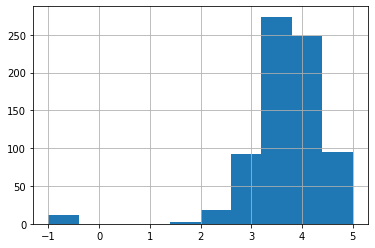

In [ ]:
df.Rating.hist()

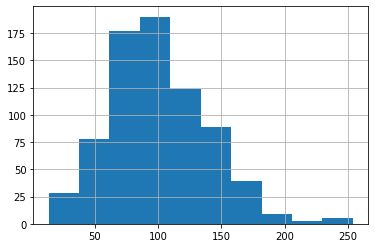

In [ ]:
df.avg_salary.hist()

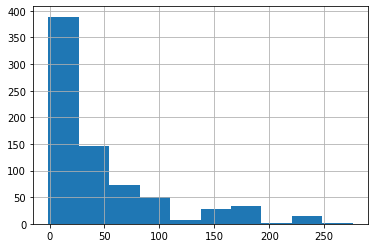

In [ ]:
df.age.hist()

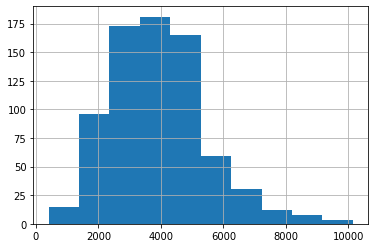

In [ ]:
df.desc_len.hist()

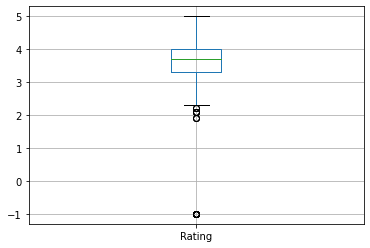

In [ ]:
df.boxplot(column = 'Rating')

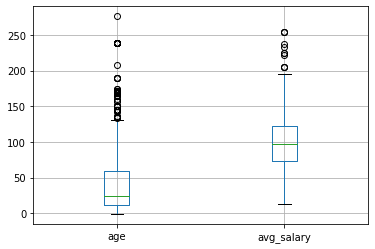

In [ ]:
df.boxplot(column = ['age','avg_salary'])

In [ ]:
df[['age','avg_salary','Rating','desc_len','Competitors_count']].corr()

,age,avg_salary,Rating,desc_len,Competitors_count
age,1.00,0.02,0.02,0.17,0.13
avg_salary,0.02,1.00,0.01,0.08,0.09
Rating,0.02,0.01,1.00,-0.01,0.03
desc_len,0.17,0.08,-0.01,1.00,0.10
Competitors_count,0.13,0.09,0.03,0.10,1.00


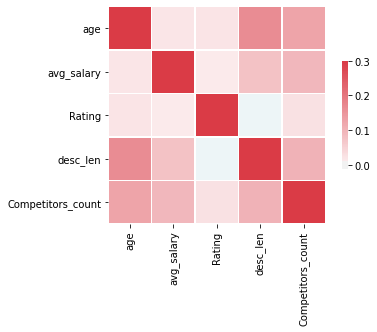

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','Competitors_count']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Now, let's go into categorical variables

In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simplifier', 'seniority', 'desc_len',
       'Competitors_count'],
      dtype='object')

In [ ]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simplifier', 'seniority']]

Making a bar chart for each category

graph for Location: total = 200


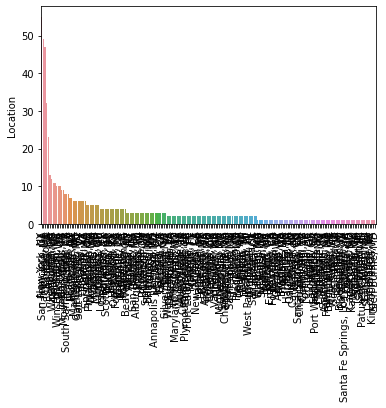

graph for Headquarters: total = 198


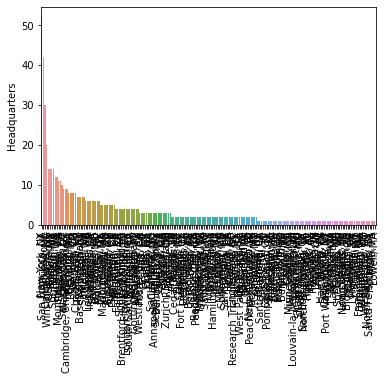

graph for Size: total = 9


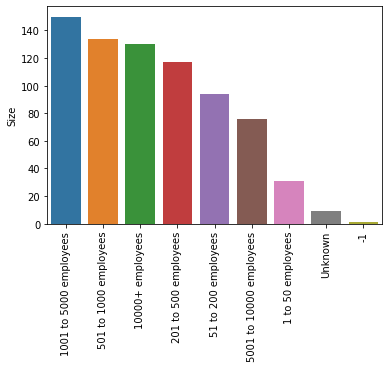

graph for Type of ownership: total = 11


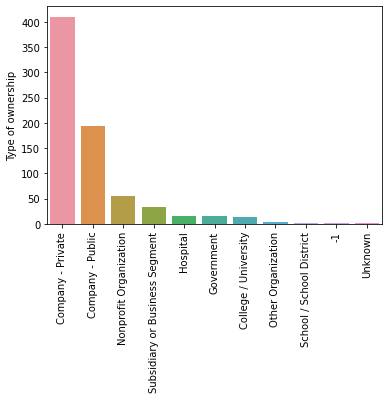

graph for Industry: total = 60


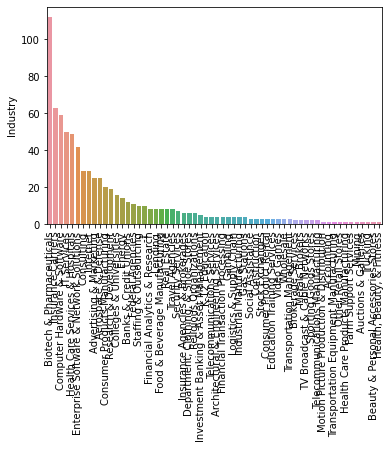

graph for Sector: total = 25


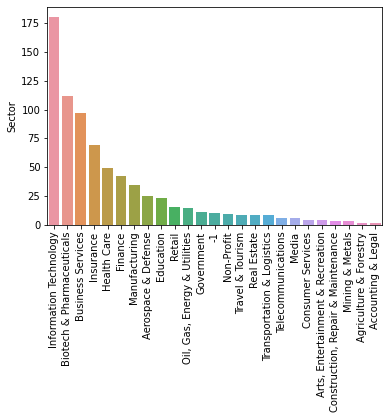

graph for Revenue: total = 14


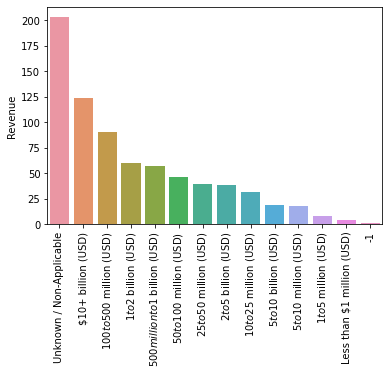

graph for company_txt: total = 343


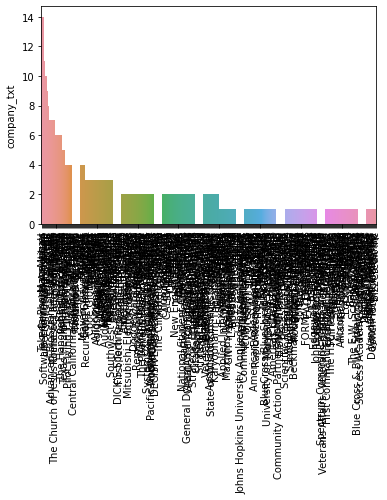

graph for job_state: total = 37


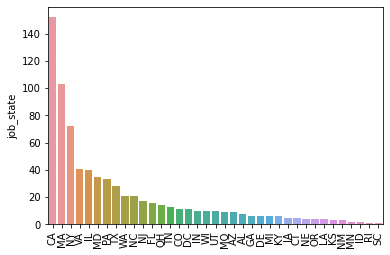

graph for same_state: total = 2


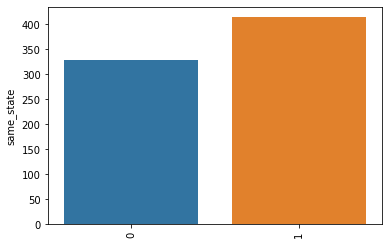

graph for python_yn: total = 2


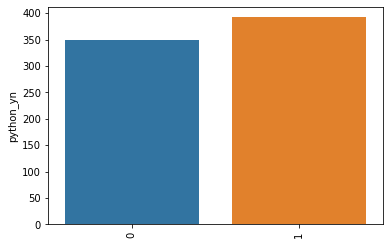

graph for R_yn: total = 2


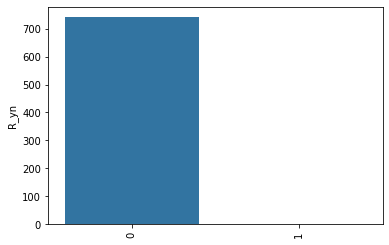

graph for spark: total = 2


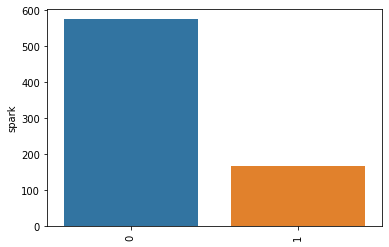

graph for aws: total = 2


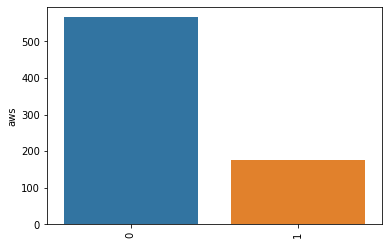

graph for excel: total = 2


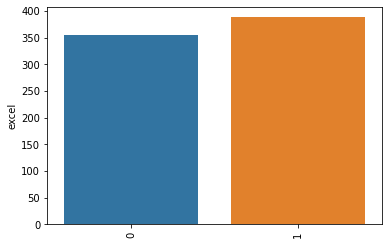

graph for job_simplifier: total = 7


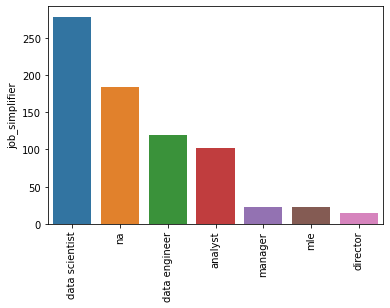

graph for seniority: total = 3


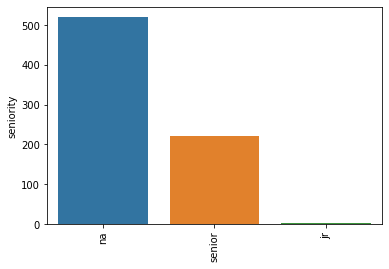

In [ ]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print("graph for %s: total = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)                                  #rotating the coordinates
  plt.show()

Top 20 results for the ones with huge value counts

graph for Location: total = 20


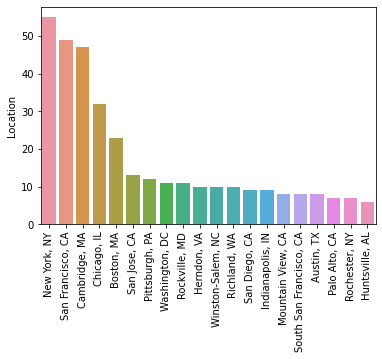

graph for Headquarters: total = 20


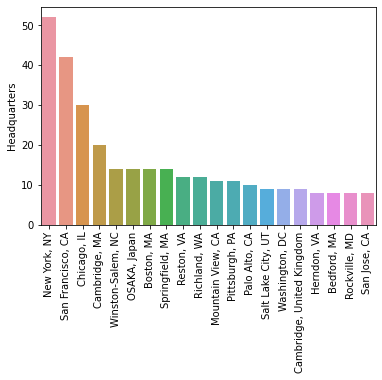

graph for company_txt: total = 20


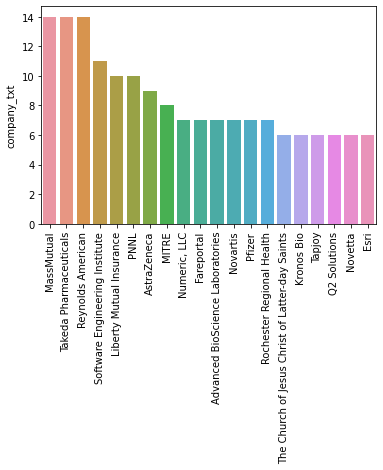

graph for Industry: total = 20


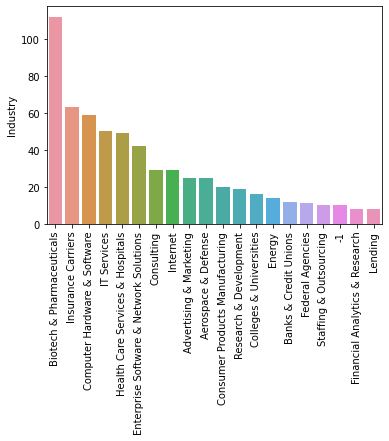

In [ ]:
for i in df_cat[['Location','Headquarters','company_txt','Industry',]].columns:
    cat_num = df_cat[i].value_counts()[:20]                                              #plots top 20 values
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simplifier', 'seniority', 'desc_len',
       'Competitors_count'],
      dtype='object')

Job and Position wise salary

In [ ]:
pd.pivot_table(df, index ='job_simplifier', values='avg_salary')

,avg_salary
job_simplifier,
analyst,65.86
data engineer,105.40
data scientist,117.56
director,168.61
manager,84.02
mle,126.43
na,84.85


In [ ]:
pd.pivot_table(df, index =['job_simplifier','seniority'], values='avg_salary')

avg_salary
job_simplifier seniority            
analyst        jr              56.50
               na              61.16
               senior          79.09
data engineer  na              96.70
               senior         124.69
data scientist jr             106.50
               na             107.04
               senior         138.96
director       na             168.61
manager        na              84.02
mle            na             119.13
               senior         142.07
na             na              73.99
               senior         109.06

State wise salary

In [ ]:
pd.pivot_table(df, index ='job_state', values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.51
IL,116.66
DC,110.18
MA,106.28
NJ,104.56
MI,100.25
RI,100.00
NY,98.65
NC,98.45


In [ ]:
pd.pivot_table(df, index = ['job_state','job_simplifier'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplifier            
WI        na                   54.00
          data scientist      113.50
          analyst              58.83
WA        na                   97.50
          data scientist       99.76
          analyst              54.50
VA        na                   79.30
          mle                  87.00
          data scientist      108.42
          data engineer        96.90
          analyst              71.58
UT        data engineer       100.33
          analyst              54.75
          data scientist      140.50
TX        na                   41.29
          data scientist      100.73
          data engineer       113.06
TN        data scientist       96.00
          data engineer       100.95
          analyst              13.50
SC        na                   60.50
RI        analyst             100.00
PA        manager             109.67
          data engineer        91.50
          data scientist      113.33
          analyst              62.75
          mle                 120.50
          na                   76.06
OR        data scientist       98.50
          data engineer        73.00
OH        na                   91.17
          data scientist      105.29
          analyst              53.88
NY        na                   81.58
          mle                 125.00
          data scientist      115.25
          data engineer        86.38
          analyst              65.61
NM        data scientist       74.33
NJ        data scientist      106.88
          analyst              83.58
          data engineer       112.00
          manager             109.50
          director            161.50
          na                   82.50
NE        na                   41.00
NC        na                   90.92
          data scientist      117.00
          data engineer       104.25
MO        na                   72.33
          manager              40.50
          data scientist      127.67
          analyst              61.00
MN        data engineer        95.00
          analyst              76.00
MI        manager              87.50
          data scientist      106.62
MD        na                   88.75
          data scientist      109.12
          data engineer       109.00
          analyst              80.67
MA        na                  107.48
          manager              71.90
          director            117.83
          data scientist      113.75
          data engineer       107.29
          analyst              59.12
LA        analyst              48.00
          data engineer        70.50
          na                   20.00
KY        na                  103.50
          data scientist       84.00
KS        mle                  87.00
IN        na                   69.00
          data scientist       84.50
          data engineer       114.50
IL        analyst              66.50
          na                   57.17
          mle                 133.00
          director            221.75
          data scientist      117.23
          data engineer        96.12
ID        analyst              56.25
IA        analyst              43.00
          data engineer       102.83
GA        data scientist       81.33
          na                   80.00
FL        data scientist       97.36
          data engineer        91.83
          analyst              47.50
DE        na                   27.50
DC        data scientist      149.00
          data engineer        85.00
          analyst              63.50
CT        na                   62.50
          data scientist       84.00
CO        mle                 100.50
          data engineer        99.00
          analyst              29.50
          na                   31.50
          data scientist      108.67
CA        na                   99.91
          mle                 177.30
          manager              80.61
          data scientist      142.52
          data engineer       129.54
          analyst             

For full list use pd.set_option('display.max_rows', None)

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [ ]:
pd.pivot_table(df, index = ['job_state','job_simplifier'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplifier            
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

Exploring for data scientist role

In [ ]:
pd.pivot_table(df[df.job_simplifier == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.00
CA,142.52
UT,140.50
MO,127.67
IL,117.23
NC,117.00
NY,115.25
MA,113.75
WI,113.50


In [ ]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors_count', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [ ]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.00       136.18
5.00        134.70
2.50        120.00
4.50        117.71
4.10        116.37
3.90        113.07
2.60        109.08
4.40        108.61
3.20        105.50
4.00        105.34
3.50        104.90
3.70        104.13
4.70        103.98
4.30        102.47
3.30        101.86
4.20        100.44
2.20         97.75
4.60         97.25
3.80         96.81
2.10         95.90
3.40         93.01
1.90         87.50
3.10         86.58
3.00         85.59
3.60         85.47
2.80         83.93
2.70         83.25
2.30         81.50
2.90         81.14
4.80         80.28
2.40         60.21
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                           163.50
Motion Picture Production & Distribution      146.00
Financial Analytics & Research                145.12
Health, Beauty, & Fitness                     139.50
Telecommunications Services            

ValueError: ignored

Companies looking for Python according to their revenues

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.00,44.00
$1 to $5 million (USD),1.00,7.00
$10 to $25 million (USD),16.00,16.00
$10+ billion (USD),66.00,58.00
$100 to $500 million (USD),47.00,44.00
$2 to $5 billion (USD),17.00,22.00
$25 to $50 million (USD),24.00,16.00
$5 to $10 billion (USD),9.00,10.00
$5 to $10 million (USD),9.00,9.00


# **WORD CLOUD**

Word cloud to see what skills are required in job description

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

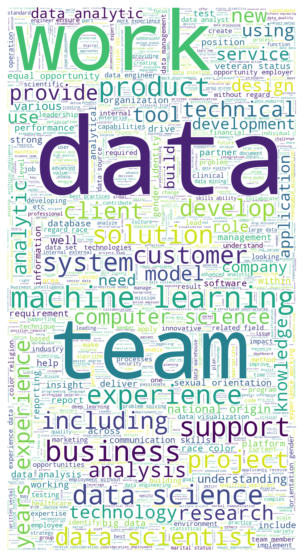

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

# **Model Building**

Choose relevant columns

In [ ]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','Competitors_count','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simplifier','seniority','desc_len']]

One Hot Encoding

In [ ]:
# get dummy data

df_dum = pd.get_dummies(df_model)
df_dum.head()

,avg_salary,Rating,Competitors_count,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,...,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_MI,job_state_MN,job_state_MO,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_OH,job_state_OR,job_state_PA,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_UT,job_state_VA,job_state_WA,job_state_WI,job_simplifier_analyst,job_simplifier_data engineer,job_simplifier_data scientist,job_simplifier_director,job_simplifier_manager,job_simplifier_mle,job_simplifier_na,seniority_jr,seniority_na,seniority_senior
0,72.00,3.80,0,0,0,0,47,1,0,0,1,2555,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,87.50,3.40,0,0,0,0,36,1,0,0,0,4828,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,85.00,4.80,0,0,0,1,10,1,1,0,1,3495,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,76.50,3.80,3,0,0,1,55,1,0,0,0,3926,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,114.50,2.90,3,0,0,1,22,1,0,0,1,2748,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


Check if their is any null data

In [ ]:
df_dum.isnull().sum()

avg_salary                                           0
Rating                                               0
Competitors_count                                    0
hourly                                               0
employer_provided                                    0
same_state                                           0
age                                                  0
python_yn                                            0
spark                                                0
aws                                                  0
excel                                                0
desc_len                                             0
Size_-1                                              0
Size_1 to 50 employees                               0
Size_10000+ employees                                0
Size_1001 to 5000 employees                          0
Size_201 to 500 employees                            0
Size_5001 to 10000 employees                         0
Size_501 t

In [ ]:
X = df_dum.drop('avg_salary', axis ='columns')
y = df_dum.avg_salary.values

In [ ]:
# train test split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(593, 177)

In [ ]:
X_test.shape

(149, 177)

In [ ]:
y_train.shape

(593,)

In [ ]:
y_test.shape

(149,)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.5785610614176904

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
la_clf = Lasso(alpha=.13)
la_clf.fit(X_train,y_train)
la_clf.score(X_test, y_test)

0.6042273566055649

**Decision Tree Regressor**

In [ ]:
from sklearn import tree
dtr_model = tree.DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)
dtr_model.score(X_test, y_test)

0.6772150354294171

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lo_clf = LinearRegression()
lo_clf.fit(X_train,y_train)
lo_clf.score(X_test, y_test)

0.5785610614176904

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor                       
rfr =  RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8008487971874722

***So,Random Forest regressor is having the best model score***

In [ ]:
from sklearn.ensemble import RandomForestRegressor                       
rfr =  RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)
y_predicted  = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)

10.88228187919463

# **Method 2- Predicting model accuracy score**

# **Using LazyPredict to determine model score**

***Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning***

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

X, y = shuffle(df_dum.drop('avg_salary', axis ='columns'), df_dum.avg_salary.values, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

 41%|████      | 16/39 [00:04<00:08,  2.66it/s]

Lars model failed to execute
Input contains NaN, infinity or a value too large for dtype('float64').


 59%|█████▉    | 23/39 [00:06<00:03,  4.46it/s]

LassoLarsCV model failed to execute
operands could not be broadcast together with shapes (75,) (74,) 


 92%|█████████▏| 36/39 [00:10<00:00,  3.93it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
[06:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 39/39 [00:10<00:00,  3.67it/s]


,R-Squared,RMSE,Time Taken
Model,,,
RandomForestRegressor,0.79,17.94,0.81
ExtraTreesRegressor,0.78,18.19,0.88
BaggingRegressor,0.78,18.52,0.09
GradientBoostingRegressor,0.74,19.85,0.26
DecisionTreeRegressor,0.74,20.03,0.04
ExtraTreeRegressor,0.72,20.71,0.04
LGBMRegressor,0.72,20.84,0.11
HistGradientBoostingRegressor,0.70,21.30,2.04
XGBRegressor,0.69,21.85,0.32


***So, after checking all the models we can say that Random Forest regressor is having the best model score that is 79%***

# **Model production deployment**

In [ ]:
import pickle
pickl = {'model': RandomForestRegressor}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [ ]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [ ]:
import certifi
import click
import flask
import itsdangerous
import jinja2
import joblib
import markupsafe
import dateutil
import pytz
import sklearn
import scipy
import six
import werkzeug

In [ ]:
import wincertstore
import mkl

In [ ]:
import flask
from flask import Flask, jsonify, request
import json
#from data_input import data_in
import numpy as np
import pickle



def load_models():
    file_name = "models/model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

app = Flask(__name__)
@app.route('/predict', methods=['GET'])
def predict():
    # stub input features
    request_json = request.get_json()
    x = request_json['input']
    #print(x)
    x_in = np.array(x).reshape(1,-1)
    # load model
    model = load_models()
    prediction = model.predict(x_in)[0]
    response = json.dumps({'response': prediction})
    return response, 200

if __name__ == '__main__':
    app.run(debug=True)